# Part 1: Stochastic Cellular Model with Markov Chain

The model in Part 0 is a deterministic cellur model, which means once the forest is formed and the fire location is determined, the results are fixed. However, in this model, stochastic model is added. It is modeled as a random ohenomenon on a regular spatial grid, specially, an interacting pacrticle system modeled as a continuous-time Markov chain on a latice.

Assuming a $n*m$ grid with 1 to represent forest area and 0 to represent non-forest area. The cell (i,j) can past the fire to four directions (i+1,j), (i-1,j), (i,j+1),(i,j-1) in random amounts of time $T_{1,0}$,$T_{-1,0}$, $T_{0,1}$,$T_{0,-1}$. The forest itself can be burning in random ampunt of time $T_{0,0}$. Each duration, T, is assumed to be indepenedent and exponentially distributed with mean $1/\lambda$

Each node can have four status, non-forest:0, forest:1, burning:2, and burned:3.

# #Exercise 1: Fire without wind

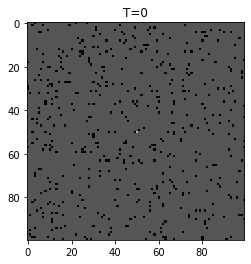

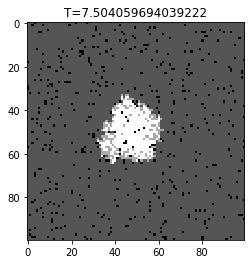

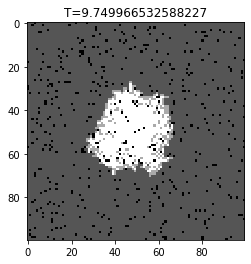

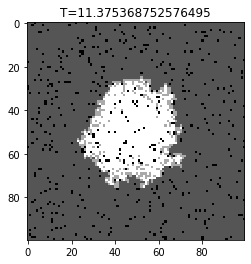

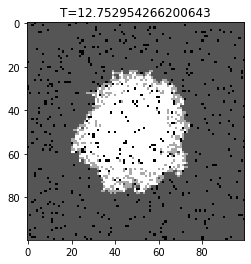

In [5]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
import heapq

class Solution:
    def __init__(self):
        #define the wind
        sn=1
        ew=1
        self.wind=[sn,1/sn,ew,1/ew]
    
    def get_random(self):
        dur0=np.random.exponential(1)*self.wind[0]  #spread time
        dur1=np.random.exponential(1)*self.wind[1]
        dur2=np.random.exponential(1)*self.wind[2]
        dur3=np.random.exponential(1)*self.wind[3]
        dur4=np.random.exponential(1/2)   #burning time
        return [dur0,dur1,dur2,dur3,dur4]
     
#infire:(T,2)    fuel:(inf,1)   no-fuel:0   burned:3  
#lamda0:burning time    lamda:spread_time 
    def forest_fire(self,m,n,p):        
        Graph=np.zeros([m,n],int)
        forest_ratio=p
        #fire_candidates=[]
        burned_area=[0]
        for i in range(m):
            for j in range(n):
                rd=np.random.randint(0,100)/100
                #print(rd)
                if rd<forest_ratio:
                    Graph[i][j]=1
                    #fire_candidates.append((i,j))
                else:
                    Graph[i][j]=0
        # print(Graph)
        
        T=0
        #fire=random.choice(fire_candidates)
        Graph[m//2][n//2]=1
        fire=(m//2,n//2)
        
        fire_list=[(0,2,fire[0],fire[1])]  #timestamp, status, x, y 
        directions=[(-1,0),(1,0),(0,1),(0,-1)]   #s,n,e,w
        #visited={}
        iter=0
        while fire_list:
            iter+=1
            T,status,x,y=heapq.heappop(fire_list)
            #print(T,status,x,y)
            dur=self.get_random()
            if status==2:
                Graph[x][y]=2
                heapq.heappush(fire_list,(T+dur[0],3,x,y))
                for (i,dir) in enumerate(directions):
                    nx,ny=x+dir[0],y+dir[1]
                    if 0<=nx<m and 0<=ny<n and Graph[nx][ny]==1:
                        heapq.heappush(fire_list,(T+dur[i],2,nx,ny))
            elif status==3:
                Graph[x][y]=3
            if iter%2000==1 and iter<10000:
                plt.figure()
                plt.imshow(Graph,cmap = 'gray',interpolation='nearest',vmin=0,vmax=3)
                plt.title("T="+str(T))  
        
test=Solution()
test.forest_fire(100,100,0.95)

plt.show()

The results show that the fire spreads to its neighour randomly but remains radiul. The node in black is the non-forest area. The node in deep gray is the forest area. The node in shallow gray is the burning area. The node in white is the burned area. According to the results, we can see that while the fire spreading outside, there are still regions that are burning, which is what the fire should be in the real world. Therefore, this model is more closed to the real forest fire than the pure cellular model.

# #Exercise 2: Fire with Wind

Now, we will introdue the wind to the model. The wind has a magnitude ,W, and a direction, $\theta$. The wind will influece the time that the fire pass from one site to its neighors. Basically, the magnitude of the wind in the North-South, $W*sin\theta$ will scale the mean value of the $T_{1,0}, T_{-1,0}$'s exponential distribution. Meanwhile, the magnitude of the wind in the West-East,  $W*cos\theta$ will scale the mean value of the $T_{0,1}, T_{0,-1}$'s exponential distribution.

Here, we simulate a wind in North-East direction. It's shown in the results that the fire spreads to the North-East direction much faster than the other directions.

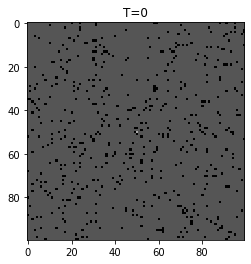

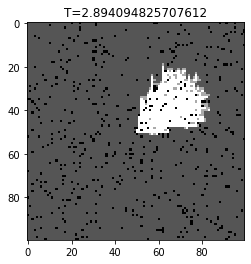

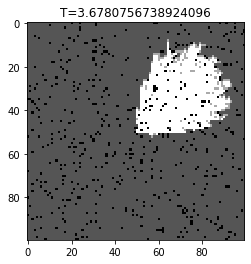

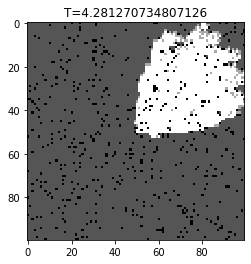

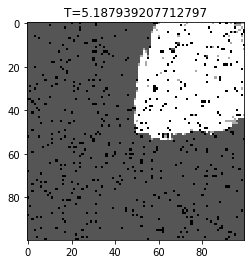

In [4]:
class Solution:
    def __init__(self):
        #define the wind
        theta=45/180*np.pi
        W=10
        ns=W*np.cos(theta)
        we=W*np.cos(theta)
        self.wind=[1/ns,ns,1/we,we]
    
    def get_random(self):
        dur0=np.random.exponential(1)*self.wind[0]  #spread time
        dur1=np.random.exponential(1)*self.wind[1]
        dur2=np.random.exponential(1)*self.wind[2]
        dur3=np.random.exponential(1)*self.wind[3]
        dur4=np.random.exponential(1/2)   #burning time
        return [dur0,dur1,dur2,dur3,dur4]
     
#infire:(T,2)    fuel:(inf,1)   no-fuel:0   burned:3  
#lamda0:burning time    lamda:spread_time 
    def forest_fire(self,m,n,p):        
        Graph=np.zeros([m,n],int)
        forest_ratio=p
        #fire_candidates=[]
        burned_area=[0]
        for i in range(m):
            for j in range(n):
                rd=np.random.randint(0,100)/100
                #print(rd)
                if rd<forest_ratio:
                    Graph[i][j]=1
                    #fire_candidates.append((i,j))
                else:
                    Graph[i][j]=0
        # print(Graph)
        
        T=0
        #fire=random.choice(fire_candidates)
        Graph[m//2][n//2]=1
        fire=(m//2,n//2)
        
        fire_list=[(0,2,fire[0],fire[1])]  #timestamp, status, x, y 
        directions=[(-1,0),(1,0),(0,1),(0,-1)]   #s,n,e,w
        #visited={}
        iter=0
        while fire_list:
            iter+=1
            T,status,x,y=heapq.heappop(fire_list)
            #print(T,status,x,y)
            dur=self.get_random()
            if status==2:
                Graph[x][y]=2
                heapq.heappush(fire_list,(T+dur[0],3,x,y))
                for (i,dir) in enumerate(directions):
                    nx,ny=x+dir[0],y+dir[1]
                    if 0<=nx<m and 0<=ny<n and Graph[nx][ny]==1:
                        heapq.heappush(fire_list,(T+dur[i],2,nx,ny))
            elif status==3:
                Graph[x][y]=3
            if iter%2000==1 and iter<10000:
                plt.figure()
                plt.imshow(Graph,cmap = 'gray',interpolation='nearest',vmin=0,vmax=3)
                plt.title("T="+str(T))
        # plt.figure()
        # plt.imshow(Graph,cmap = 'gray',interpolation='nearest',vmin=0,vmax=3)
        # plt.title("T="+str(T))
        #print(iter)    
        
test=Solution()
test.forest_fire(100,100,0.95)

plt.show()

# #Further Improvement

We will add rivers into the forest, where the forests near the river are more difficult to be burned. 
We will also simulate the fire extinguishment including cutting the edge of the fire and cooling down the fire center by helicopters. 